In [1]:
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from statsmodels.tsa.stattools import adfuller

In [2]:
coins = ['BTC-USD','ETH-USD','BNB-USD','XRP-USD','ADA-USD','DOGE-USD','AVAX-USD',
                'TRX-USD','DOT-USD','LINK-USD','AAVE-USD','MATIC-USD',]
result = []  
interval = '1d'
threshold = 0.1
most_stationary_coin = None
lowest_pvalue = float('inf')


In [3]:
for coin in coins:
    data = yf.download(coin,interval=interval, start="2022-11-01", end="2023-11-01")['Close'].dropna()
    result.append((data,coin))
    stationary_list=[]
    # print(f"{coin} Data:")
    # print(data.head())
    # Perform ADF test
def perform_adf_test(data):
    result = adfuller(data[0])
    p_value = result[1]
    print(p_value)
    if p_value <threshold :
      stationary_list.append(data)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:

for d in result:
  perform_adf_test(d)

0.8847855278596934
0.43386344284120804
0.38330053826784716
0.3750324517728211
0.285698086398659
0.19768333395772547
0.28673060575746956
0.9731785266492364
0.34054072212766057
0.7387312012109455
0.05651391153305918
0.6102257365608008


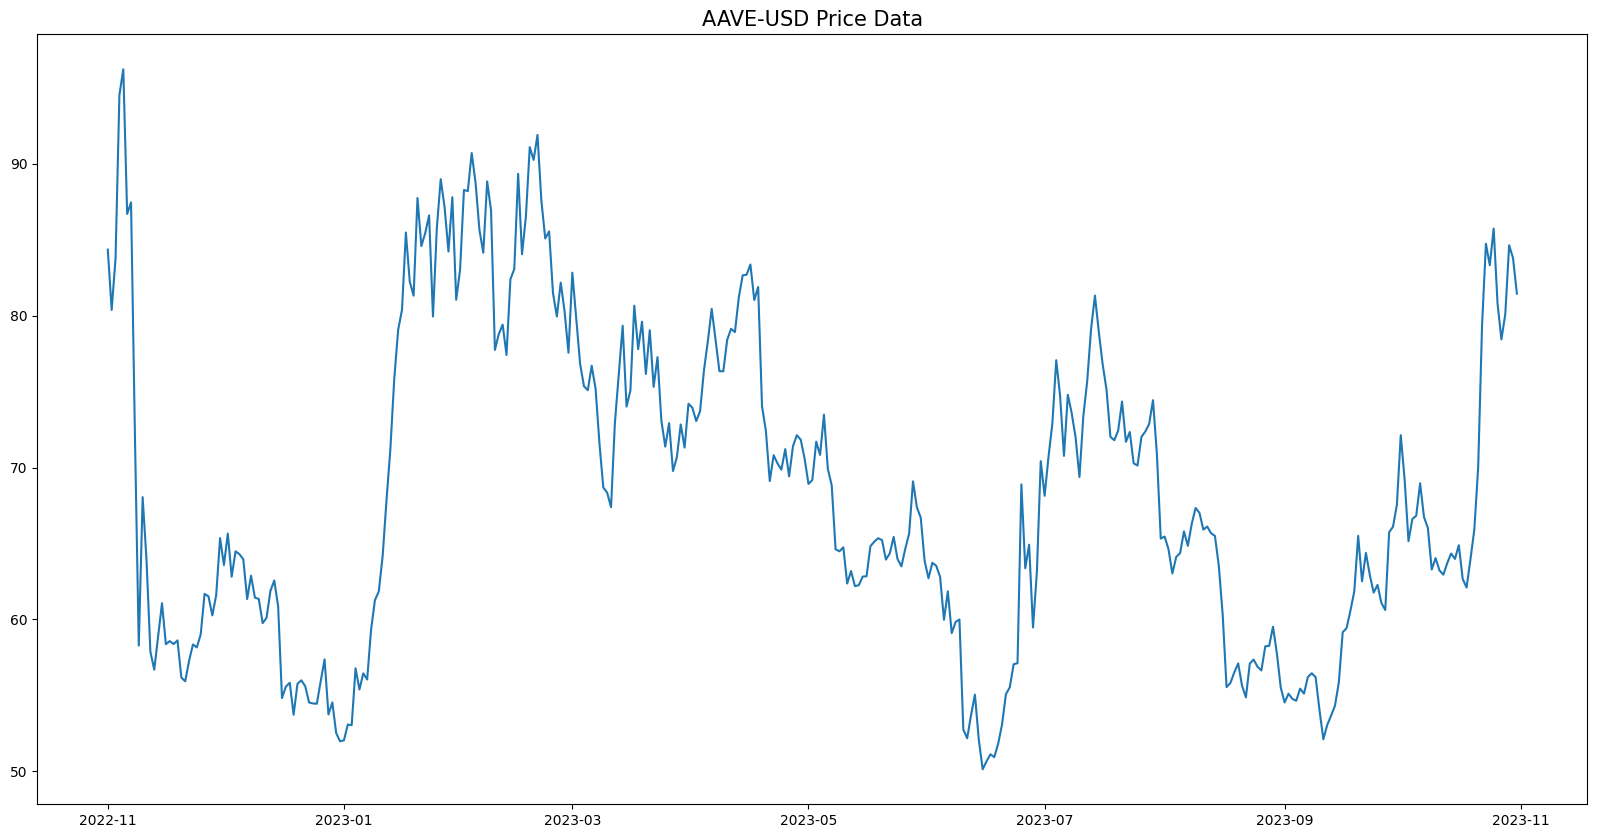

In [5]:
for i in stationary_list:
  plt.figure(figsize=(20,10))
  plt.plot(i[0])
  plt.title("%s Price Data"%i[1], fontsize=15)

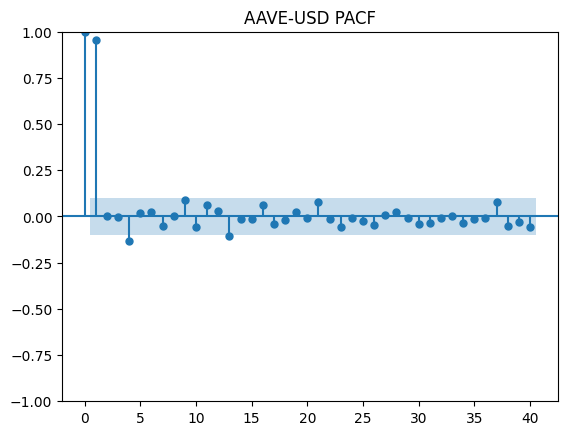

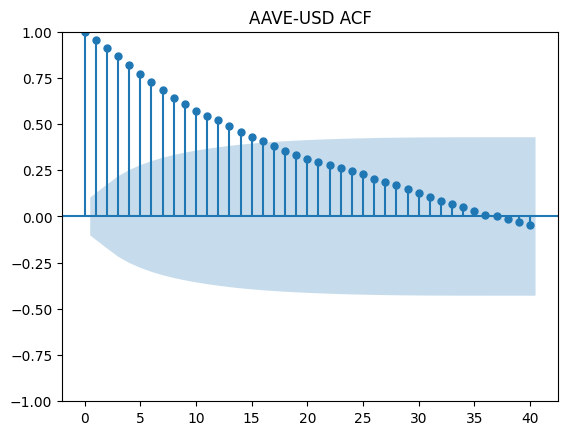

In [6]:
for i in  stationary_list:
  
  pacf_plot = plot_pacf(i[0],lags=40,title=f'{i[1]} PACF')
  acf_plot = plot_acf(i[0], lags=40,title=f'{i[1]} ACF')

In [7]:
#p according to PACF:1
#q according to ACF:15
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [8]:

best_model = None
lowest_error = float('inf')
best_error_metrics = {}
test_start_date = data.index.max() - pd.DateOffset(months=1)
test_data = data[test_start_date:]  
train_data = data[:test_start_date]  
# Here p=1 and q=15 as given
p = 1
q = 15

for model_type in ['AR', 'MA', 'ARMA']:
    
    if model_type == 'AR':
        order = (p, 0, 0)
    elif model_type == 'MA':
        order = (0, 0, q)
    elif model_type == 'ARMA':
        order = (p, 0, q)
    
    
    model = ARIMA(train_data, order=order)
    model_fit = model.fit()
    

    predictions = model_fit.forecast(steps=len(test_data))
    
    # Calculate error metrics
    mse = mean_squared_error(test_data, predictions)
    mape = mean_absolute_percentage_error(test_data, predictions)
    print(f" Model Type: {model_type}")
    print(f" Model MSE: {mse}")
    print(f" Model MAPE: {mape}")
    
    if mse < lowest_error:
        best_model = model_fit
        lowest_error = mse

        best_error_metrics = {
            'mse': mse,
            'mape': mape,
            'model_type': model_type
        }

        
       
print(f"Best Model Type: {best_error_metrics['model_type']}")
print(f"Best Model MSE: {best_error_metrics['mse']}")
print(f"Best Model MAPE: {best_error_metrics['mape']}")

c:\Users\Mohammad\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Mohammad\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Mohammad\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Mohammad\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Mohammad\AppData\Local\Programs\Python\

 Model Type: AR
 Model MSE: 0.0033252601653635675
 Model MAPE: 8.091901792937046


c:\Users\Mohammad\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Mohammad\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Mohammad\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Mohammad\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


 Model Type: MA
 Model MSE: 0.07040491295721191
 Model MAPE: 44.05103707638171
 Model Type: ARMA
 Model MSE: 0.0015760396581602342
 Model MAPE: 6.130860179106404
Best Model Type: ARMA
Best Model MSE: 0.0015760396581602342
Best Model MAPE: 6.130860179106404


c:\Users\Mohammad\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
def train_and_test_models(data, coin):


  test_start_date = data.index.max() - pd.DateOffset(months=1)
  test_data = data[test_start_date:]  
  train_data = data[:test_start_date]  


  best_model = None
  best_p = None
  best_q = None
  lowest_error = float('inf')
  model_results = {}
  for model_type in ['AR', 'MA', 'ARMA']:
    for p in range(1, 10):
      for q in range(1, 10):
        if model_type == 'AR':
          model = ARIMA(train_data, order=(p, 0, 0))
        elif model_type == 'MA':
          model = ARIMA(train_data, order=(0, 0, q))
        else:
          model = ARIMA(train_data, order=(p, 0, q))

        model_fit = model.fit()


        predicted_start = train_data.shape[0]
        predicted_end = predicted_start + test_data.shape[0] - 1
        predictions = model_fit.predict(start=predicted_start, end=predicted_end, dynamic=False)


        predictions.index = test_data.index

        mse = mean_squared_error(test_data, predictions)
        mape = mean_absolute_percentage_error(test_data, predictions)
        combined_error = mape + mse

        if combined_error < lowest_error  :
          best_model = model_fit
          best_p = p
          best_q = q
          lowest_error = combined_error



        model_results[f'{model_type}_{p}_{q}'] = {
            'model': model_fit,
            'mse':mse,
            'mape':mape,
            'combined_error':combined_error,
        }

 
  return best_model, best_p, best_q, lowest_error, model_results,mse,mape,combined_error

In [10]:

for i in stationary_list:
  coin = i[1]
  data = i[0]




  best_model, best_p, best_q, test_error, model_results,mse,mape,combined_error = train_and_test_models(data, coin)

  print(f"Coin: {coin}")
  print(f"Best Model: \n{best_model.summary()}")
  print(f"Best p: {best_p}, Best q: {best_q}")
  print(f"Test Error: {test_error}")
  print(f"MSE: {mse}")
  print(f"MAPE: {mape}")
  print(f"combined_error: {combined_error}")

c:\Users\Mohammad\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Mohammad\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Mohammad\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Mohammad\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Mohammad\AppData\Local\Programs\Python\

Coin: AAVE-USD
Best Model: 
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  334
Model:                 ARIMA(8, 0, 9)   Log Likelihood                -822.748
Date:                Fri, 15 Dec 2023   AIC                           1683.496
Time:                        00:10:55   BIC                           1755.908
Sample:                    11-01-2022   HQIC                          1712.368
                         - 09-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.2053      3.295     20.702      0.000      61.748      74.663
ar.L1          0.2389      0.168      1.423      0.155      -0.090       0.568
ar.L2          0.2358   

c:\Users\Mohammad\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
